In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [9]:
x= np.arange(10).reshape(-1,1)
y= np.array([0,0,0,0,0,0,1,1,1,1])

In [10]:
x

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [11]:
model= LogisticRegression(solver='liblinear', random_state=0)

In [12]:
model.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Logistic Regression with Python : Handwriting Recognition

In [22]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [23]:
x,y = load_digits(return_X_y=True)


In [24]:
print(x)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [25]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)

In [26]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [27]:
model= LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [28]:
x_test = scaler.transform(x_test)


In [29]:
y_pred= model.predict(x_test)


In [30]:
model.score(x_train, y_train)

0.964509394572025

In [31]:
model.score(x_test, y_test)

0.9416666666666667

In [32]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 1,  1, 33,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  1,  2,  0,  0,  0,  1, 33,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  1, 36]])

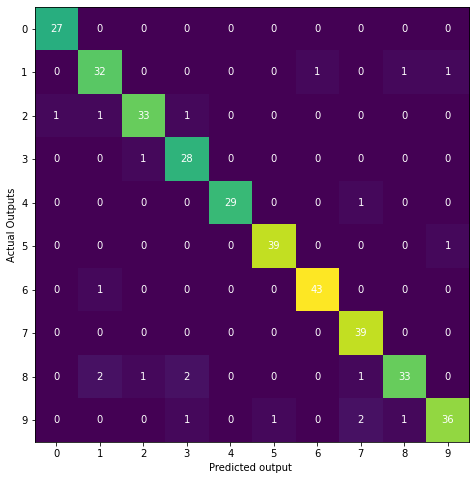

In [34]:
cm= confusion_matrix(y_test, y_pred)

fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel("Predicted output ", color='black')
ax.set_ylabel("Actual Outputs", color="black")
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i,j], ha='center', va='center', color="white")
plt.show()